# day 95

# unsupervised learning:

# clustering to find patterns

1. this idea is predicted upon the idea that the machine needs to cluster data together to see emerging pattern and then classify them according to their distinctions.

# Dimensionality Reduction:

1. this is predicated upon the idea that the machine will reduce the number of features in a dataset to help visulize and predict well without too much of noisy features. it removes some features by taking it to lower dimension hence the name. 


# k-means clustering rules:

1. Each point must belong to a cluster 
2. Each point must belong to only one cluster 


# k-means clustering working mechanics:

1. we randomly choose points from the data.
2. we calculate and cluster points together based on how close they are to the initially chosen random points.
3. we take the centre of each cluster and choose which cluster each point belongs to based on their proximity to the     centre. 

In [8]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('bank-full.csv')
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0          93.994          -36.4      4.857       5191.0          no  
1          93.994          -36.4      4.857       5191.0          no  
2          93.994          -36.4      4.857       5191.0          no  
3          93.994          -36.4      4.857       5191.0          no  
4          93.994          -36.4      4.857       5191.0          no  

[5 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

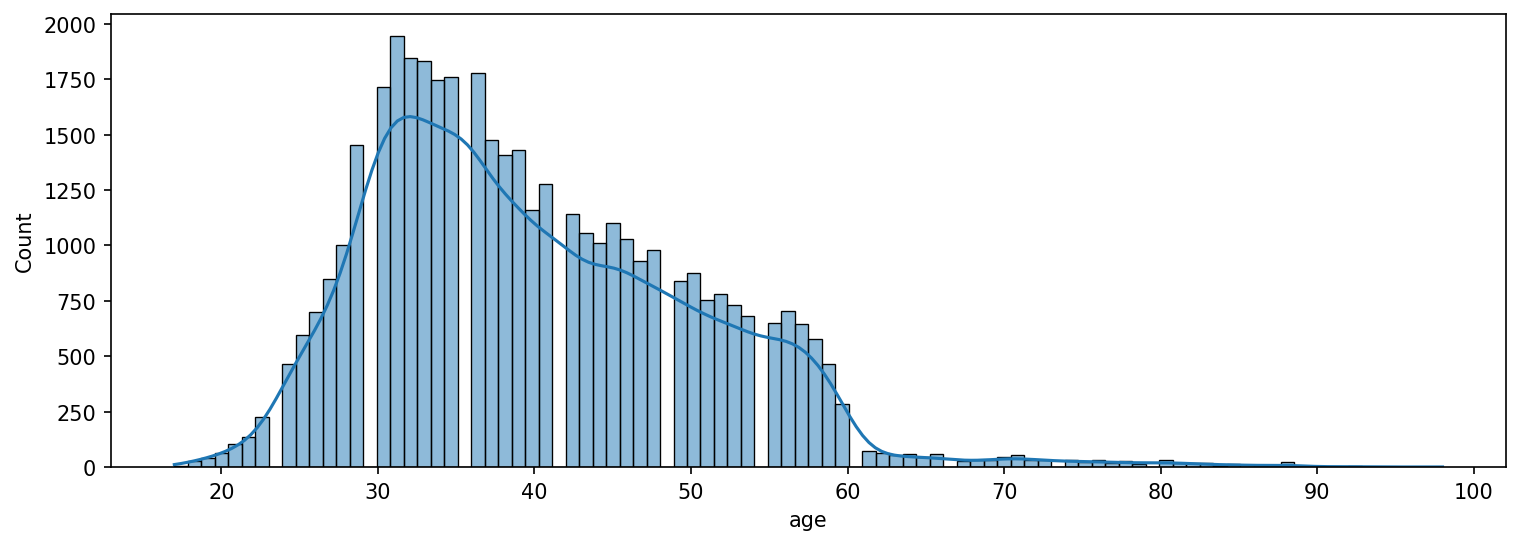

In [14]:
plt.figure(figsize=(12,4),dpi=150)

# freedman diaconis rule for # of bins:
x = df['age']
h = 2*stats.iqr(x)/(len(x)**(1/3))
n_bins = (max(x) - min(x))/h

# plotting
sns.histplot(data=df,x='age',bins=int(np.ceil(n_bins)),kde=True)

plt.show()

In [10]:
n_bins

In [12]:
int(np.ceil(n_bins))

# find out how many people were contacted by the bank professionals to sell their loan

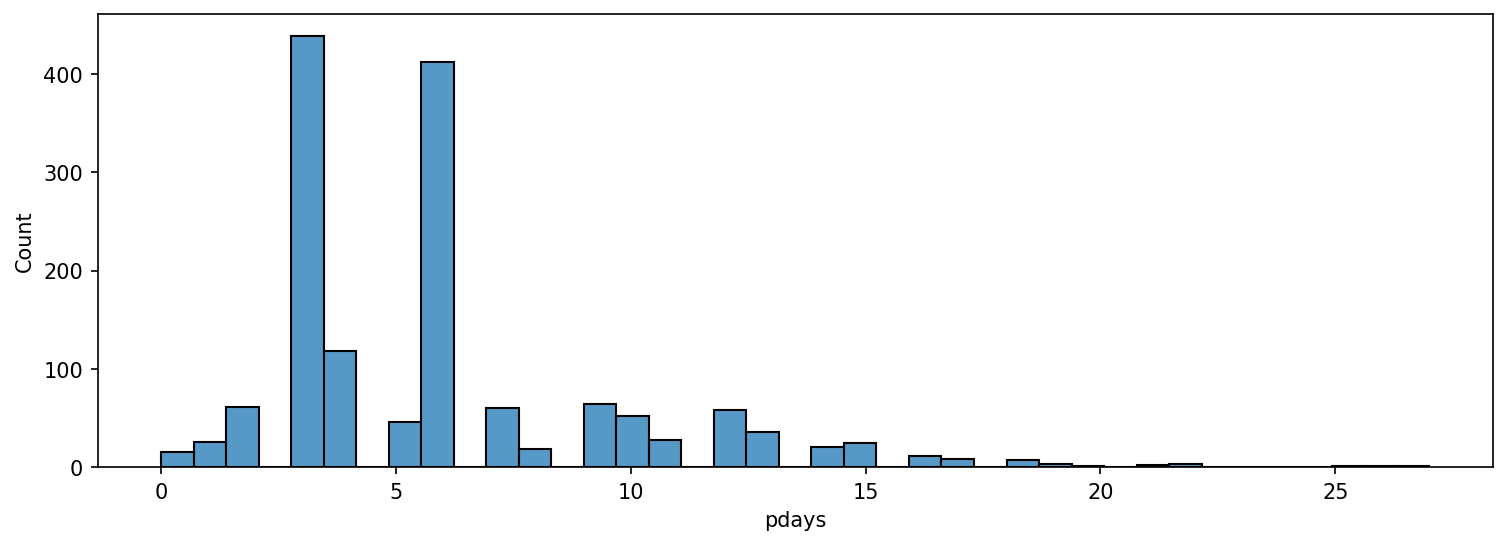

In [19]:
plt.figure(figsize=(12,4),dpi=150)

pdays_data = df[df['pdays'] != 999]

sns.histplot(data=pdays_data,x='pdays')

plt.show()

# find the mode of contact

In [21]:
df['contact'].unique()


# the banking officials have contacted the potential customers either through landline or cellphone it seems.

array(['telephone', 'cellular'], dtype=object)

# find out the duration of conversations

In [23]:
df['duration']


# it is in seconds

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

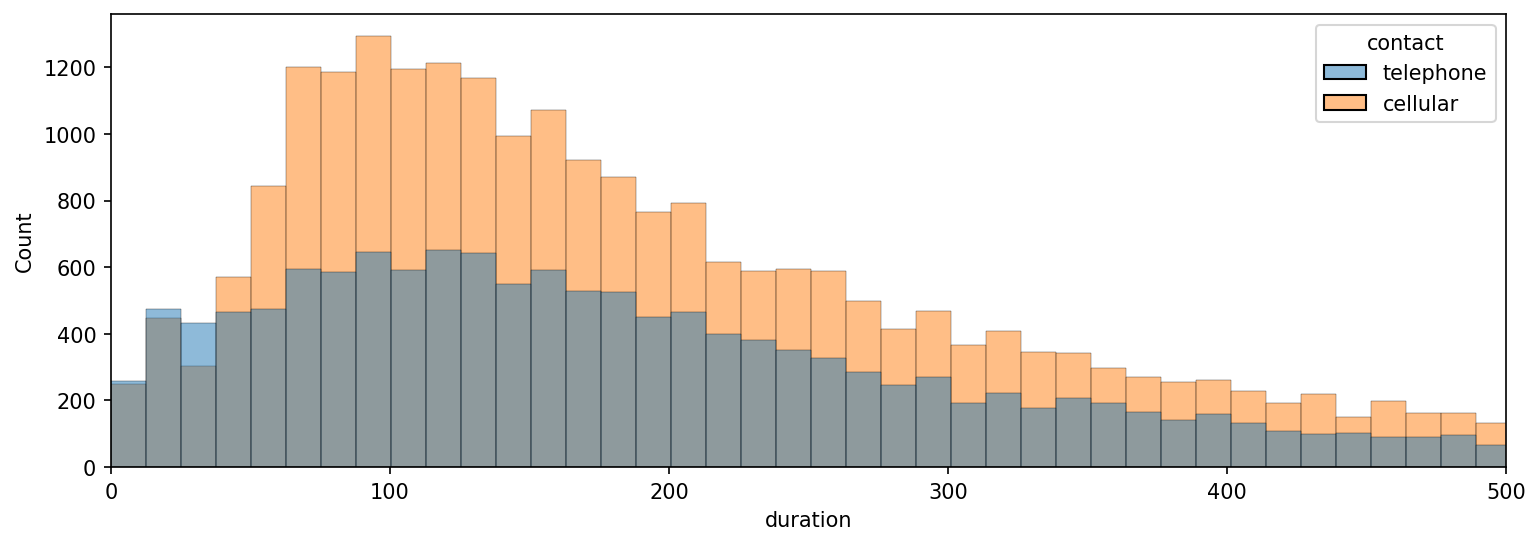

In [38]:
plt.figure(figsize=(12,4),dpi=150)

# freedman diaconis bins
x = df['duration']
h = (2*stats.iqr(x))/(len(x)**(1/3))
n_bins = (max(x) - min(x)) / h


sns.histplot(data=df,x='duration',bins=int(np.ceil(n_bins)),hue='contact')

plt.xlim(0,500)
plt.show()

# grey scale means the merge of two colors. 

In [26]:
n_bins

<bound method Series.count of 0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64>

<AxesSubplot:xlabel='contact', ylabel='count'>

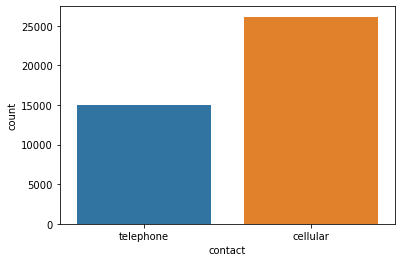

In [39]:
sns.countplot(data=df,x='contact')

# see the professions of the customers

In [40]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [43]:
df['job'].value_counts().index

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object')

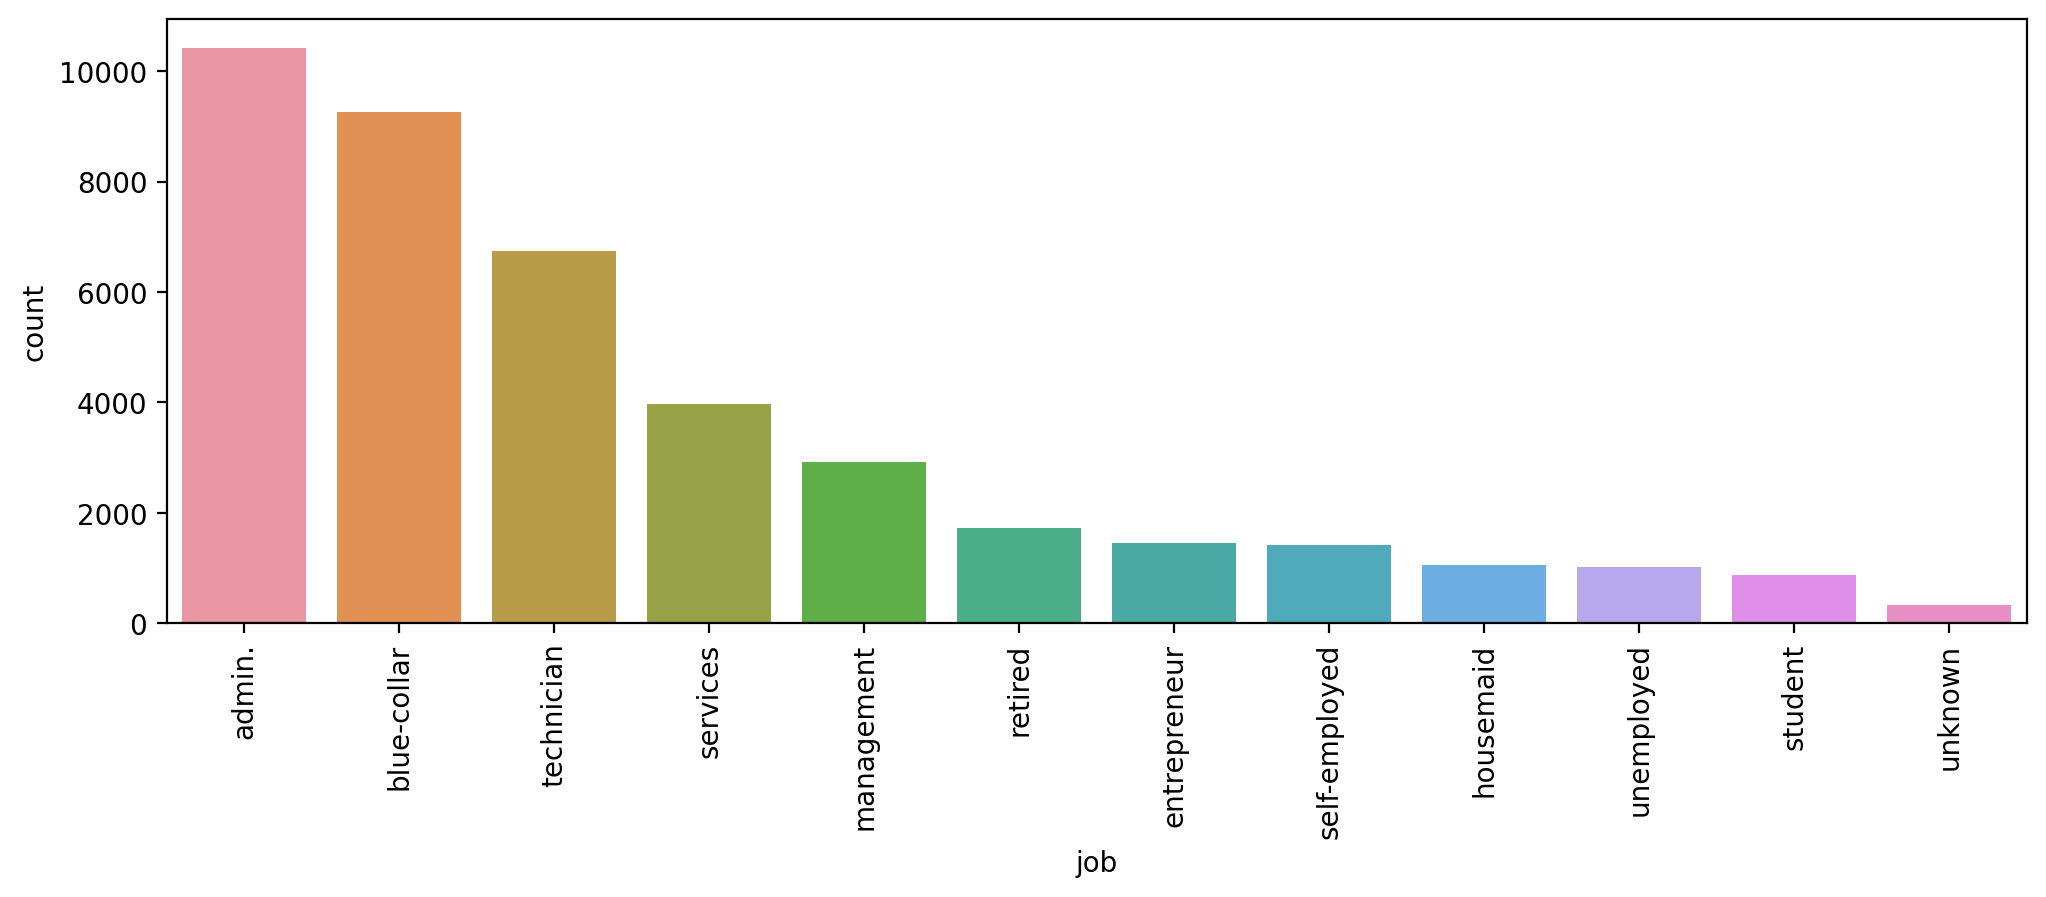

In [45]:
plt.figure(figsize=(12,4),dpi=200)

sns.countplot(data=df,x='job',order=df['job'].value_counts().index)

plt.xticks(rotation=90)
plt.show()

# see people's education

In [49]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [50]:
df['education'].value_counts().index

Index(['university.degree', 'high.school', 'basic.9y', 'professional.course',
       'basic.4y', 'basic.6y', 'unknown', 'illiterate'],
      dtype='object')

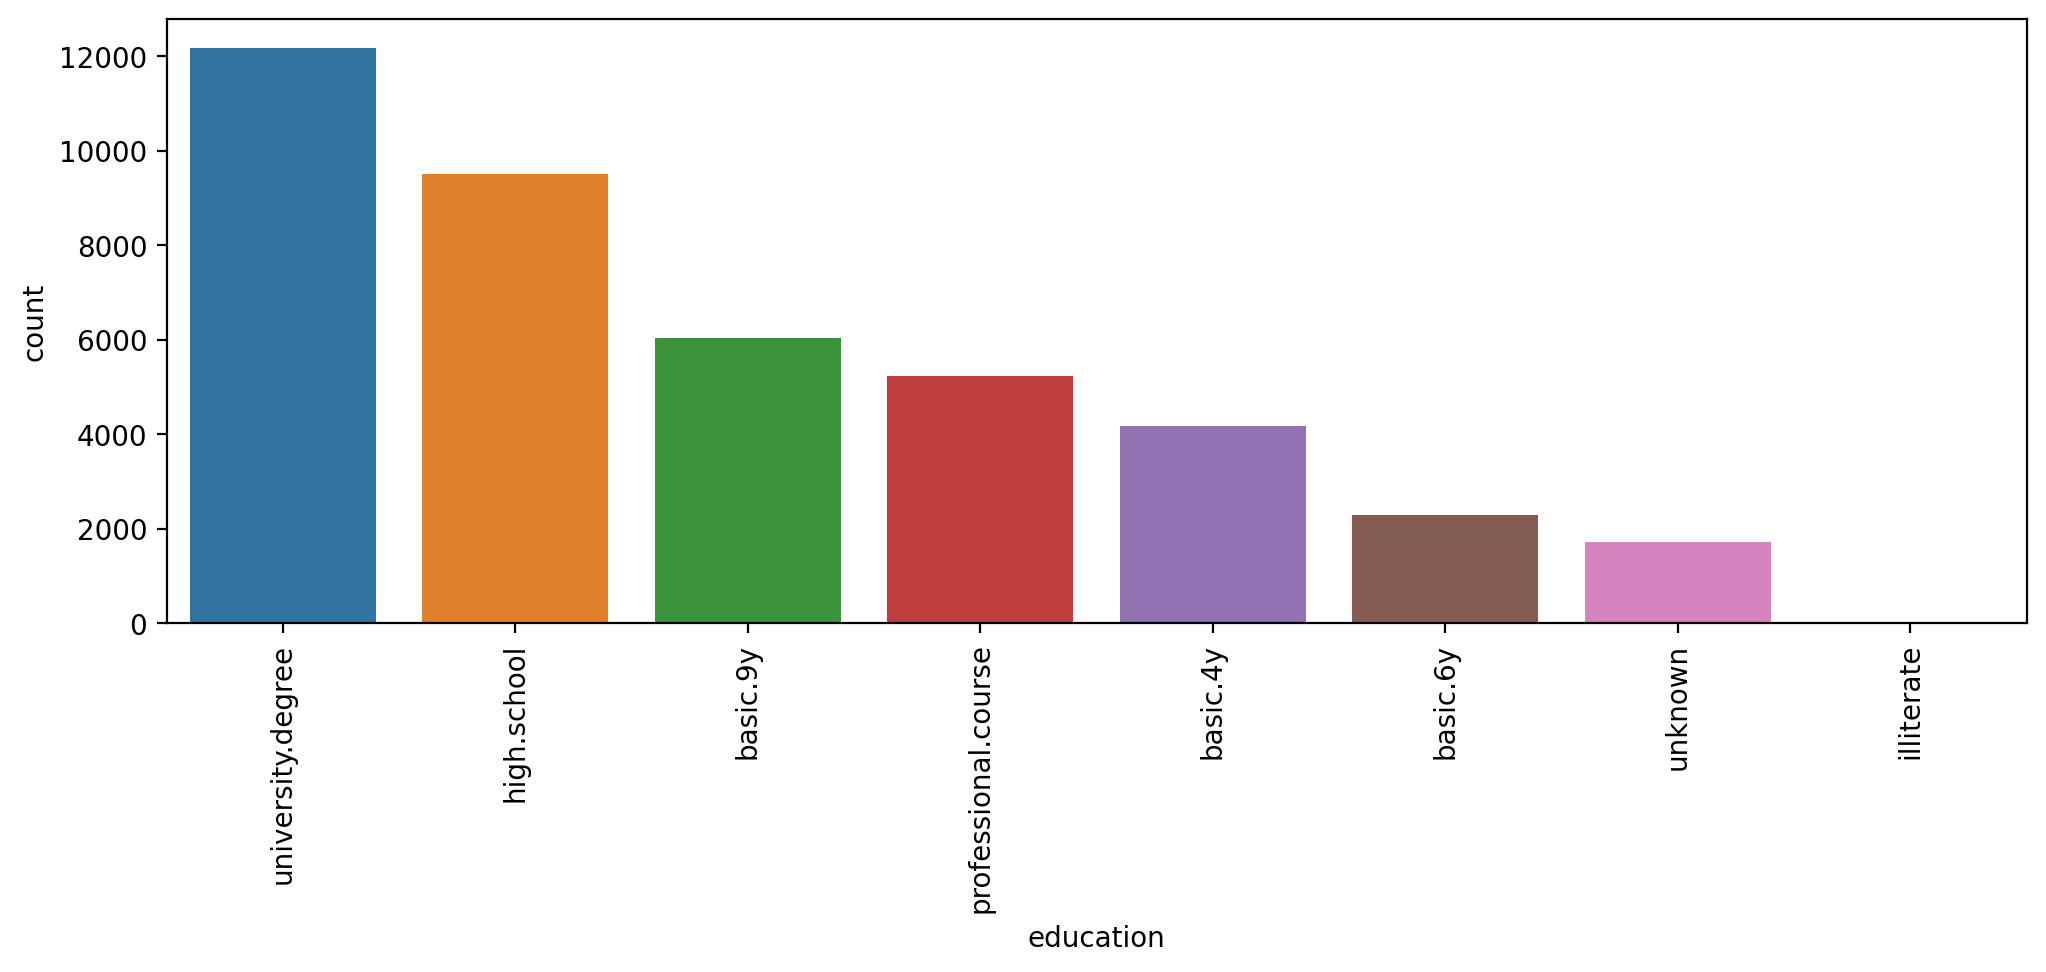

In [51]:
plt.figure(figsize=(12,4),dpi=200)

sorted_index = df['education'].value_counts().index

sns.countplot(data=df,x='education',order=sorted_index)

plt.xticks(rotation=90)
plt.show()

# Based on the person's education say if they would default on the loan they took

In [53]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0          93.994          -36.4      4.857       5191.0          no  
1          93.994          -36.4      4.857       5191.0          no  
2          93.994          -36.4      4.857       5191.0          no  
3          93.994          -36.4      4.857       5191.0          no  
4          93.994          -36.4      4.857       5191.0          no  

[5 rows x 21 columns]

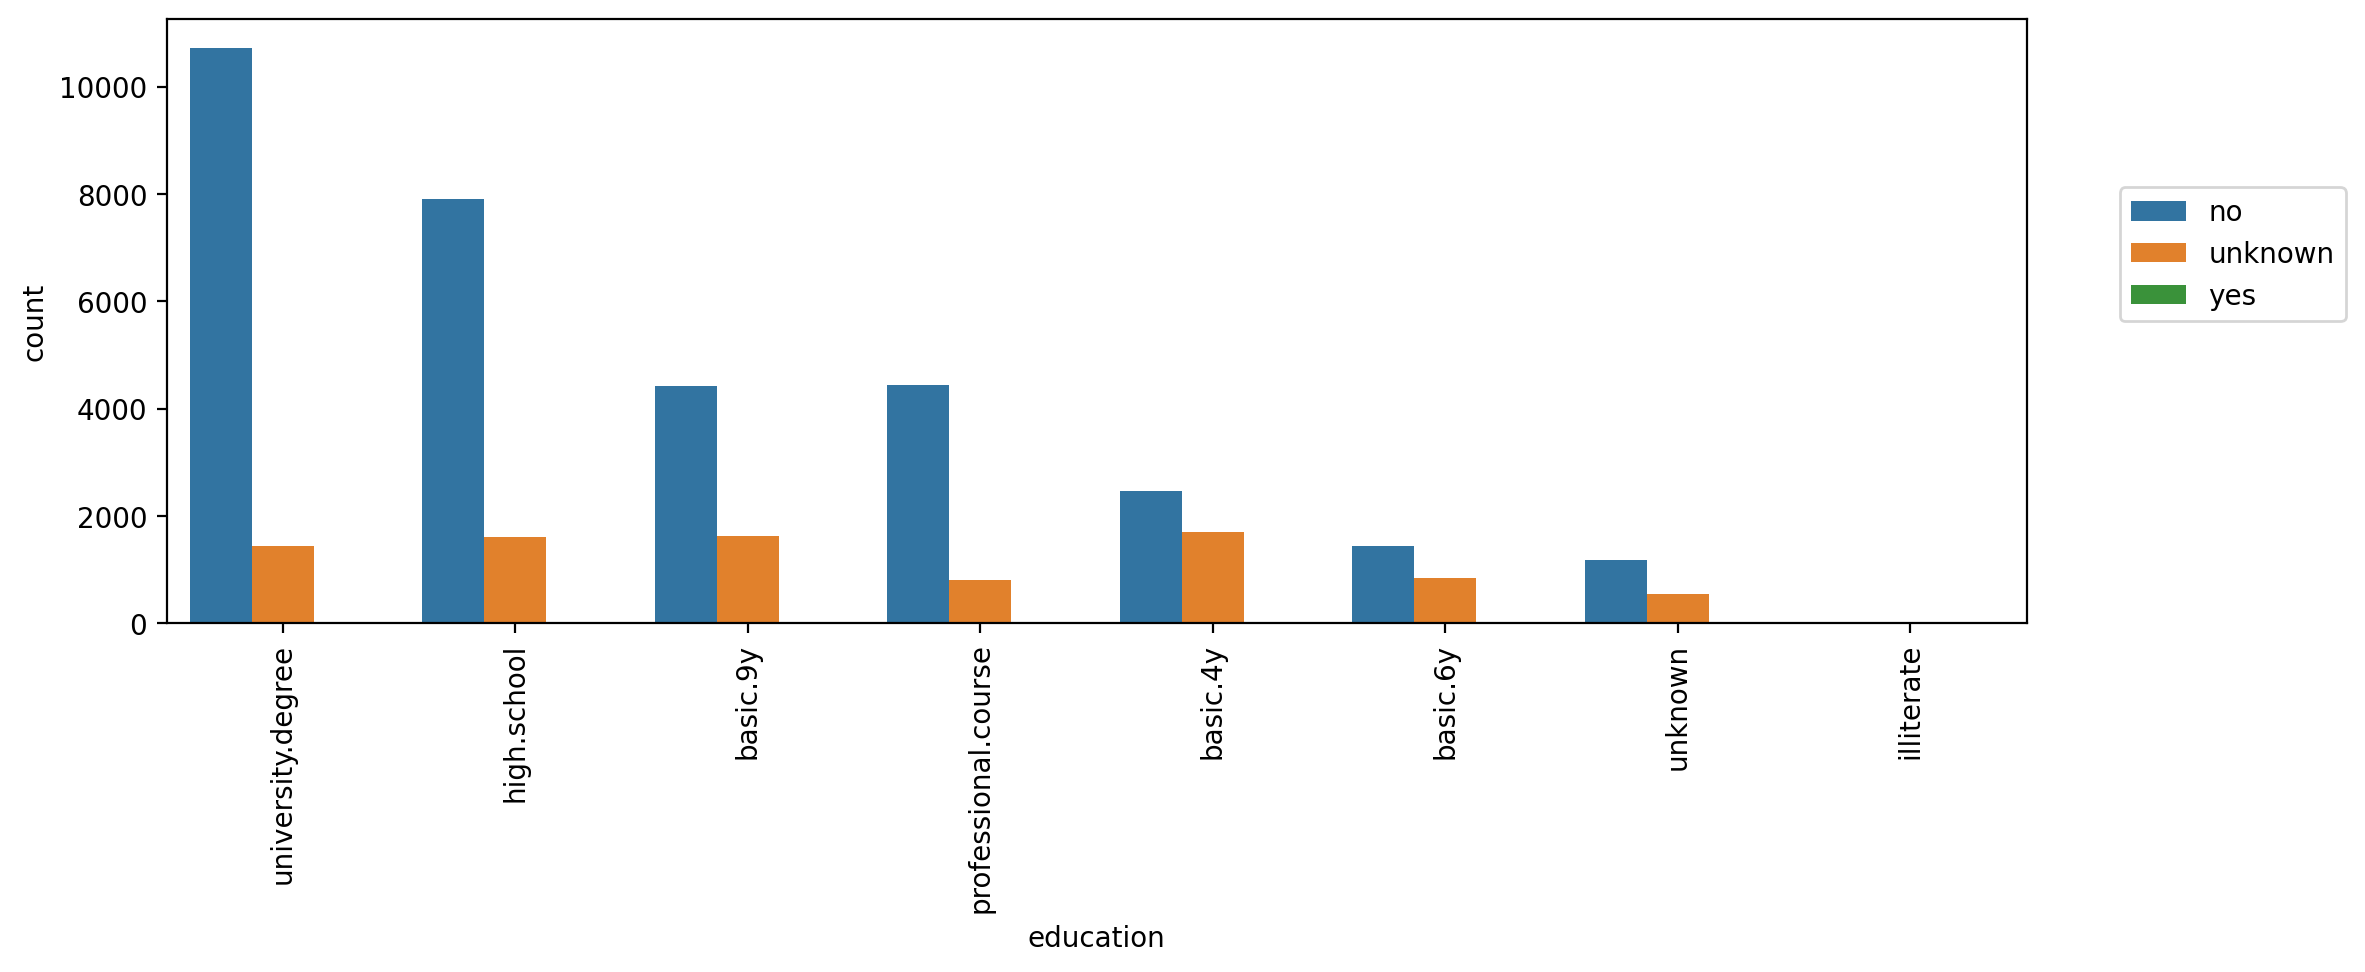

In [56]:
plt.figure(figsize=(12,4),dpi=200)

sorted_index = df['education'].value_counts().index

sns.countplot(data=df,x='education',order=sorted_index,hue='default')

plt.xticks(rotation=90)

plt.legend(loc=(1.05,0.5))
plt.show()

# how many people have defaulted?

In [57]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

# find the education of the people who have defaulted?

In [58]:
df[df['default'] == 'yes']['education']

21580    professional.course
21581    professional.course
24866            high.school
Name: education, dtype: object

# find all status of the people who have defaulted?

In [59]:
df[df['default'] == 'yes']

age         job  marital            education default housing loan  \
21580   48  technician  married  professional.course     yes      no   no   
21581   48  technician  married  professional.course     yes     yes   no   
24866   31  unemployed  married          high.school     yes      no   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
21580  cellular   aug         tue  ...         1    999         0   
21581  cellular   aug         tue  ...         1    999         0   
24866  cellular   nov         tue  ...         2    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
21580  nonexistent          1.4          93.444          -36.1      4.963   
21581  nonexistent          1.4          93.444          -36.1      4.963   
24866      failure         -0.1          93.200          -42.0      4.153   

       nr.employed  subscribed  
21580       5228.1          no  
21581       5228.1          no  
24866       5195.8          no  

[3 rows x 21 columns]

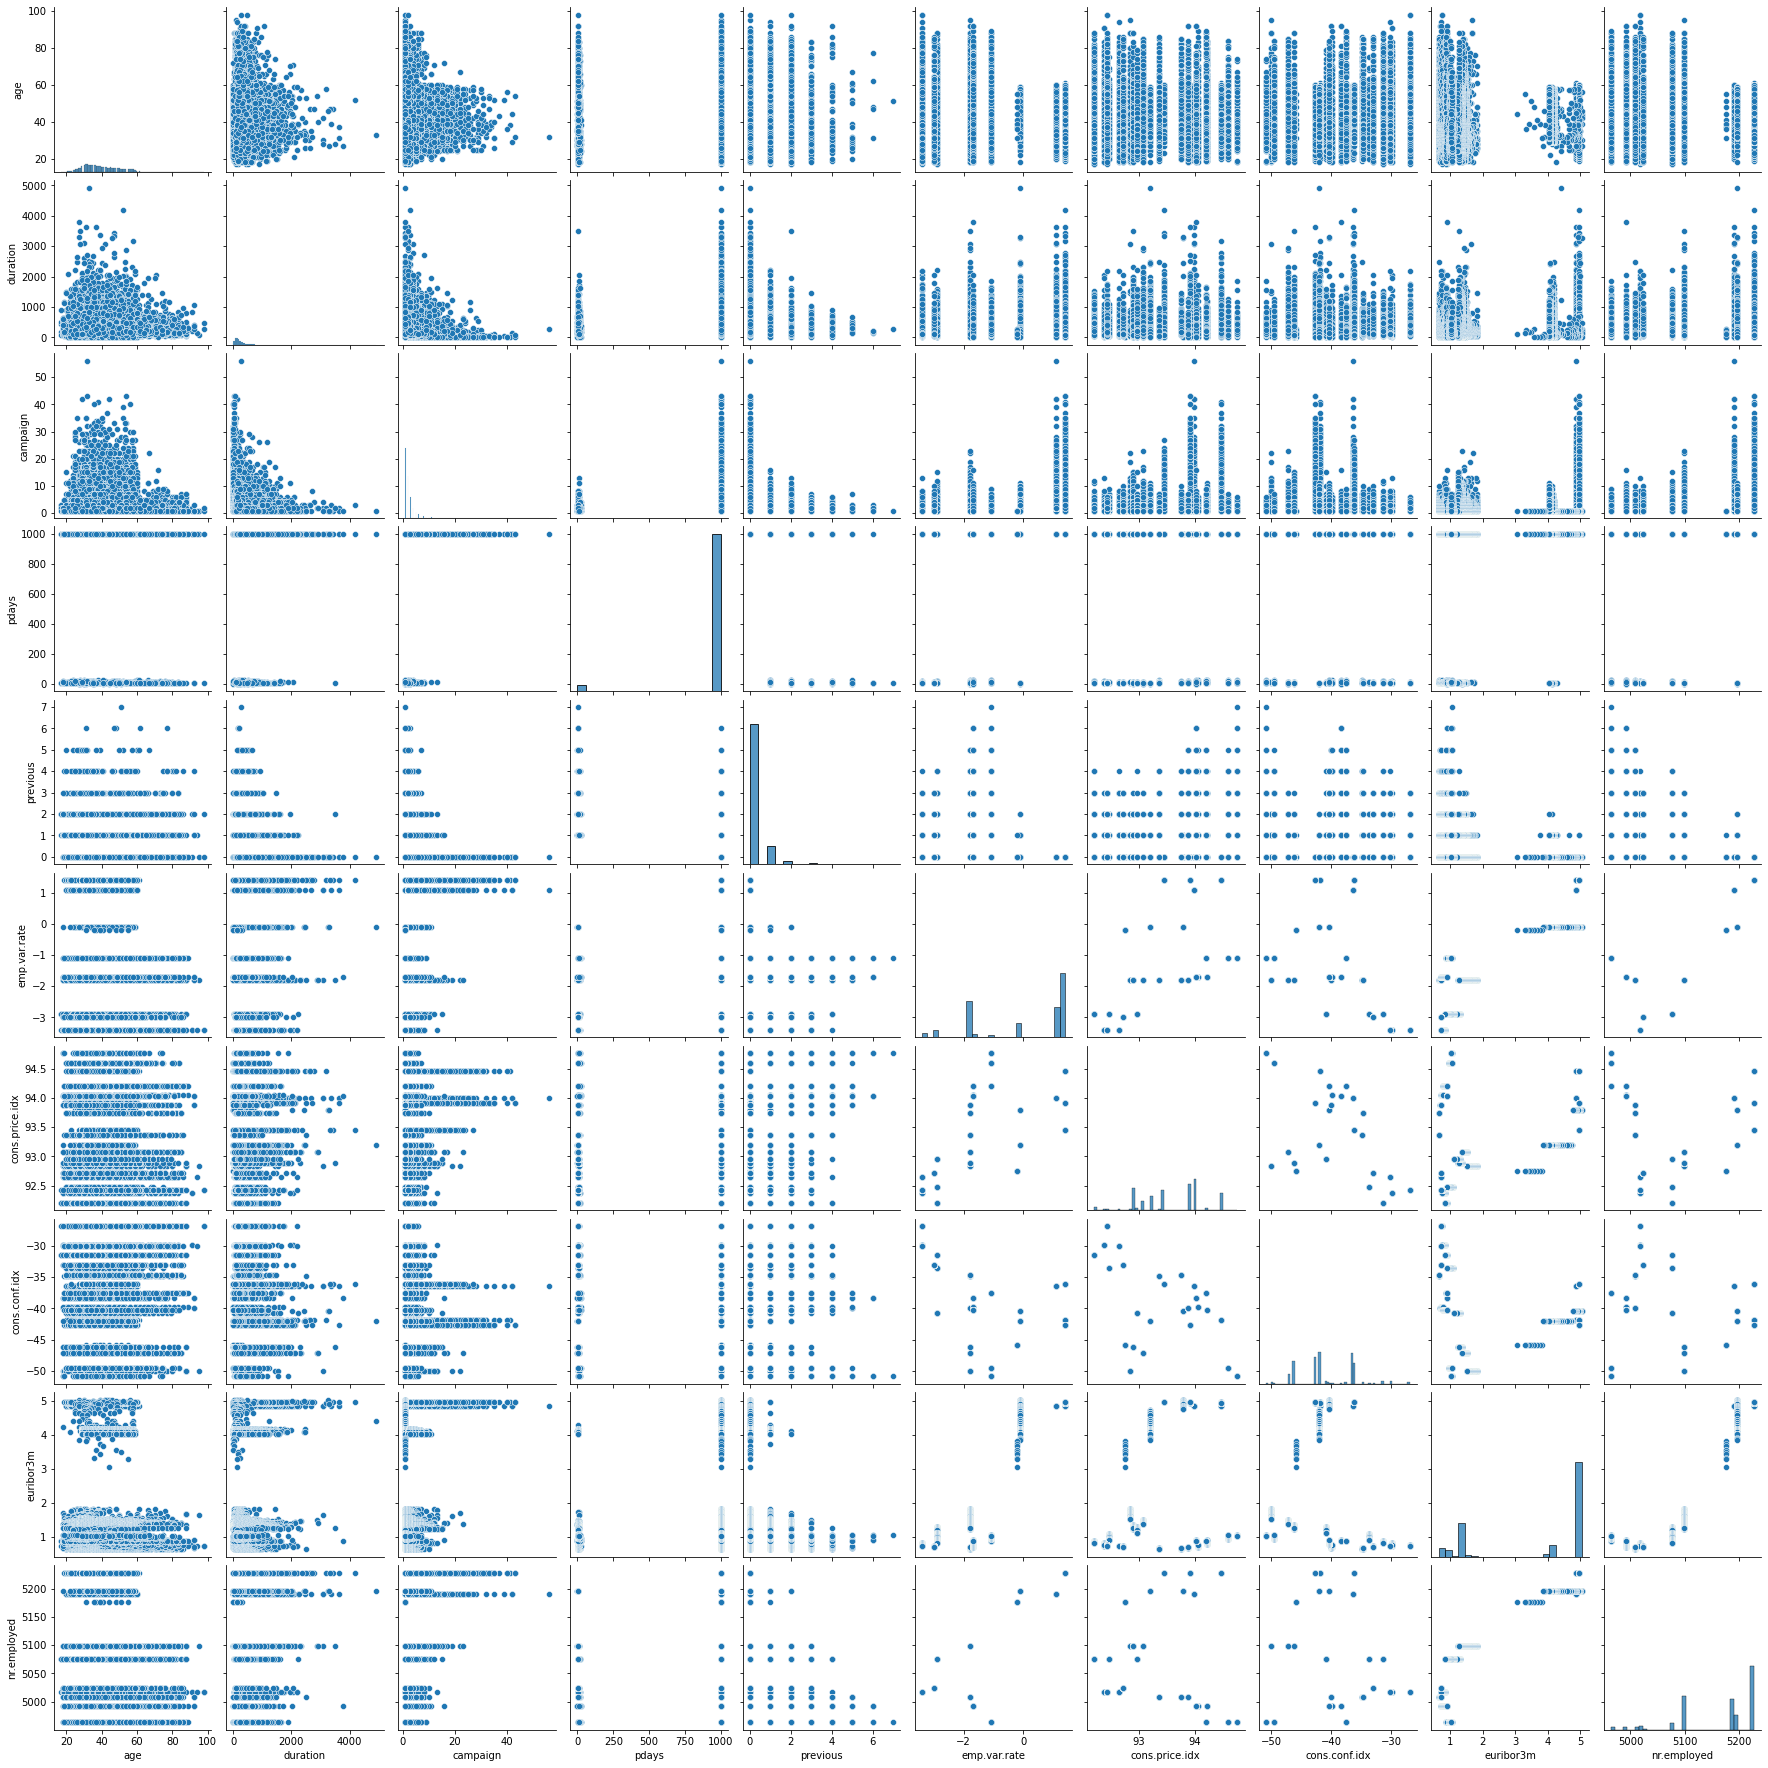

In [60]:
sns.pairplot(df)

# data analysis using k-means clustering.

1. there is no y which means there is no labelled data

2. we are going to only have x

# important insights 

* only when you have the training data and testing data should you worry about data leakage. and when scaling scale only the x_train and x_test. but when you have no test data set then you can directly fit_transform.



* in k-means clustering we don't have to worry too much about categorical dummies(0 and 1) of different features having perfect correlation with each other distorting the reality even though they are just mirror of each other. subscribed_no and subscriped_yes are mirrors of each other forming perfect negative correlation (one goes up the hill and the other goes down the hill). to avoid perfectly correlating features we generally would use drop_first in pd.get_dummies(df,drop_first=True) but the instructor says that it is unnecessary in k-means clustering reason is unknown. 


* we can directly fit_transform and fit_predict etc,. we don't have to do fit and transform seperately in unsupervised learning models. 

In [61]:
# converting categorical values to 1's and 0's

x = pd.get_dummies(data=df)
x

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56       261         1    999         0           1.1          93.994   
1       57       149         1    999         0           1.1          93.994   
2       37       226         1    999         0           1.1          93.994   
3       40       151         1    999         0           1.1          93.994   
4       56       307         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  ...  day_of_week_fri  \
0              -36.4      4.857       5191.0  ...                0   
1              -36.4      4.857       5191.0  ...                0   
2              -36.4      4.857       5191.0  ...                0   
3              -36.4      4.857       5191.0  ...                0   
4              -36.4      4.857       5191.0  ...                0   
...              ...        ...          ...  ...              ...   
41183          -50.8      1.028       4963.6  ...                1   
41184          -50.8      1.028       4963.6  ...                1   
41185          -50.8      1.028       4963.6  ...                1   
41186          -50.8      1.028       4963.6  ...                1   
41187          -50.8      1.028       4963.6  ...                1   

       day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0                    1                0                0                0   
1                    1                0                0                0   
2                    1                0                0                0   
3                    1                0                0                0   
4                    1                0                0                0   
...                ...              ...              ...              ...   
41183                0                0                0                0   
41184                0                0                0                0   
41185                0                0                0                0   
41186                0                0                0                0   
41187                0                0                0                0   

       poutcome_failure  poutcome_nonexistent  poutcome_success  \
0                     0                     1                 0   
1                     0                     1                 0   
2                     0                     1                 0   
3                     0                     1                 0   
4                     0                     1                 0   
...                 ...                   ...               ...   
41183                 0                     1                 0   
41184                 0                     1                 0   
41185                 0                     1                 0   
41186                 0                     1                 0   
41187                 1                     0                 0   

       subscribed_no  subscribed_yes  
0                  1               0  
1                  1               0  
2                  1               0  
3                  1               0  
4                  1               0  
...              ...             ...  
41183              0               1  
41184              1               0  
41185              1               0  
41186              0               1  
41187              1              

In [62]:
# scaling the x

# scaling means normalizing the values in datatable. we don't want values in one feature have more weightage because it is 
# way way way larger than the values of the rest of the features. 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_x = scaler.fit_transform(x)

scaled_x

array([[ 1.53303429,  0.01047142, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 1.62899323, -0.42150051, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [-0.29018564, -0.12451981, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       ...,
       [ 1.53303429, -0.26722482, -0.20490853, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 0.38152696,  0.70856893, -0.56592197, ..., -0.1857    ,
        -2.80655022,  2.80655022],
       [ 3.26029527, -0.07438021,  0.15610492, ..., -0.1857    ,
         0.35630932, -0.35630932]])

In [90]:
# clustering

from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)

clustered_labels = model.fit_predict(scaled_x)

clustered_labels

array([1, 1, 1, ..., 0, 0, 0])

In [91]:
# assigning the clusters to x

x['clusters'] = clustered_labels
x

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56       261         1    999         0           1.1          93.994   
1       57       149         1    999         0           1.1          93.994   
2       37       226         1    999         0           1.1          93.994   
3       40       151         1    999         0           1.1          93.994   
4       56       307         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  ...  day_of_week_mon  \
0              -36.4      4.857       5191.0  ...                1   
1              -36.4      4.857       5191.0  ...                1   
2              -36.4      4.857       5191.0  ...                1   
3              -36.4      4.857       5191.0  ...                1   
4              -36.4      4.857       5191.0  ...                1   
...              ...        ...          ...  ...              ...   
41183          -50.8      1.028       4963.6  ...                0   
41184          -50.8      1.028       4963.6  ...                0   
41185          -50.8      1.028       4963.6  ...                0   
41186          -50.8      1.028       4963.6  ...                0   
41187          -50.8      1.028       4963.6  ...                0   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_failure  \
0                    0                0                0                 0   
1                    0                0                0                 0   
2                    0                0                0                 0   
3                    0                0                0                 0   
4                    0                0                0                 0   
...                ...              ...              ...               ...   
41183                0                0                0                 0   
41184                0                0                0                 0   
41185                0                0                0                 0   
41186                0                0                0                 0   
41187                0                0                0                 1   

       poutcome_nonexistent  poutcome_success  subscribed_no  subscribed_yes  \
0                         1                 0              1               0   
1                         1                 0              1               0   
2                         1                 0              1               0   
3                         1                 0              1               0   
4                         1                 0              1               0   
...                     ...               ...            ...             ...   
41183                     1                 0              0               1   
41184                     1                 0              1               0   
41185                     1                 0              1               0   
41186                     1                 0              0               1   
41187                     0                 0              1               0   

       clusters  
0             1  
1             1  
2             1  
3             1  
4             1  
...         ...  
41183         0  
41184         0  
41185         0  
41186         0  
41187         0  

[41188 rows x 66 columns]

In [92]:
# trying the discover the meaningfulness of the cluster using pearson-coefficient correlation

x.corr().T

age  duration  campaign     pdays  previous  \
age                   1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration             -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign              0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays                -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous              0.024365  0.020640 -0.079141 -0.587514  1.000000   
...                        ...       ...       ...       ...       ...   
poutcome_nonexistent -0.016376 -0.011665  0.087645  0.491353 -0.878776   
poutcome_success      0.035626  0.044876 -0.050893 -0.950700  0.524045   
subscribed_no        -0.030399 -0.405274  0.066357  0.324914 -0.230181   
subscribed_yes        0.030399  0.405274 -0.066357 -0.324914  0.230181   
clusters              0.029834  0.009733  0.051014 -0.371123 -0.011635   

                      emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                      -0.000371        0.000857       0.129372   0.010767   
duration                 -0.027968        0.005312      -0.008173  -0.032897   
campaign                  0.150754        0.127836      -0.013733   0.135133   
pdays                     0.271004        0.078889      -0.091342   0.296899   
previous                 -0.420489       -0.203130      -0.050936  -0.454494   
...                            ...             ...            ...        ...   
poutcome_nonexistent      0.472501        0.304264       0.099724   0.488406   
poutcome_success         -0.256886       -0.077416       0.084824  -0.281022   
subscribed_no             0.298334        0.136211      -0.054878   0.307771   
subscribed_yes           -0.298334       -0.136211       0.054878  -0.307771   
clusters                  0.498124        0.216419       0.216590   0.506643   

                      nr.employed  ...  day_of_week_mon  day_of_week_thu  \
age                     -0.017725  ...         0.019027        -0.021356   
duration                -0.044703  ...        -0.023068         0.014666   
campaign                 0.144095  ...         0.014405         0.005141   
pdays                    0.372605  ...         0.001031        -0.008186   
previous                -0.501333  ...        -0.002012         0.001512   
...                           ...  ...              ...              ...   
poutcome_nonexistent     0.493051  ...         0.002226        -0.000585   
poutcome_success        -0.350613  ...        -0.002276         0.008827   
subscribed_no            0.354678  ...         0.021265        -0.013888   
subscribed_yes          -0.354678  ...        -0.021265         0.013888   
clusters                 0.476717  ...        -0.013886         0.024098   

                      day_of_week_tue  day_of_week_wed  poutcome_failure  \
age                          0.019137        -0.023671         -0.002537   
duration                     0.004140         0.014537         -0.013311   
campaign                    -0.025125        -0.021088         -0.068890   
pdays                       -0.007300         0.001021          0.006354   
previous                     0.000090        -0.003929          0.682608   
...                               ...              ...               ...   
poutcome_nonexistent         0.001574         0.006545         -0.853119   
poutcome_success             0.007258        -0.000390         -0.063006   
subscribed_no               -0.008046        -0.006302         -0.031799   
subscribed_yes               0.008046         0.006302          0.031799   
clusters                     0.025284         0.019783         -0.337130   

                      poutcome_nonexistent  poutcome_success  subscribed_no  \
age                              -0.016376          0.035626      -0.030399   
duration                         -0.011665          0.044876      -0.405274   
campaign                          0.087645         -0.050893       0.066357   
pdays                             0

In [93]:
# analysing the cluster

# iloc[:-1] goes until the last but not including the cluster itself 

x.corr()['clusters']

age                     0.029834
duration                0.009733
campaign                0.051014
pdays                  -0.371123
previous               -0.011635
                          ...   
poutcome_nonexistent    0.112727
poutcome_success        0.355786
subscribed_no          -0.000395
subscribed_yes          0.000395
clusters                1.000000
Name: clusters, Length: 66, dtype: float64

In [73]:
x.corr()['clusters'].iloc[:-1].sort_values()

previous               -0.478467
poutcome_failure       -0.464295
contact_cellular       -0.410476
month_apr              -0.357923
subscribed_yes         -0.294610
                          ...   
poutcome_nonexistent    0.544377
cons.price.idx          0.679372
nr.employed             0.886155
emp.var.rate            0.932612
euribor3m               0.959297
Name: clusters, Length: 65, dtype: float64

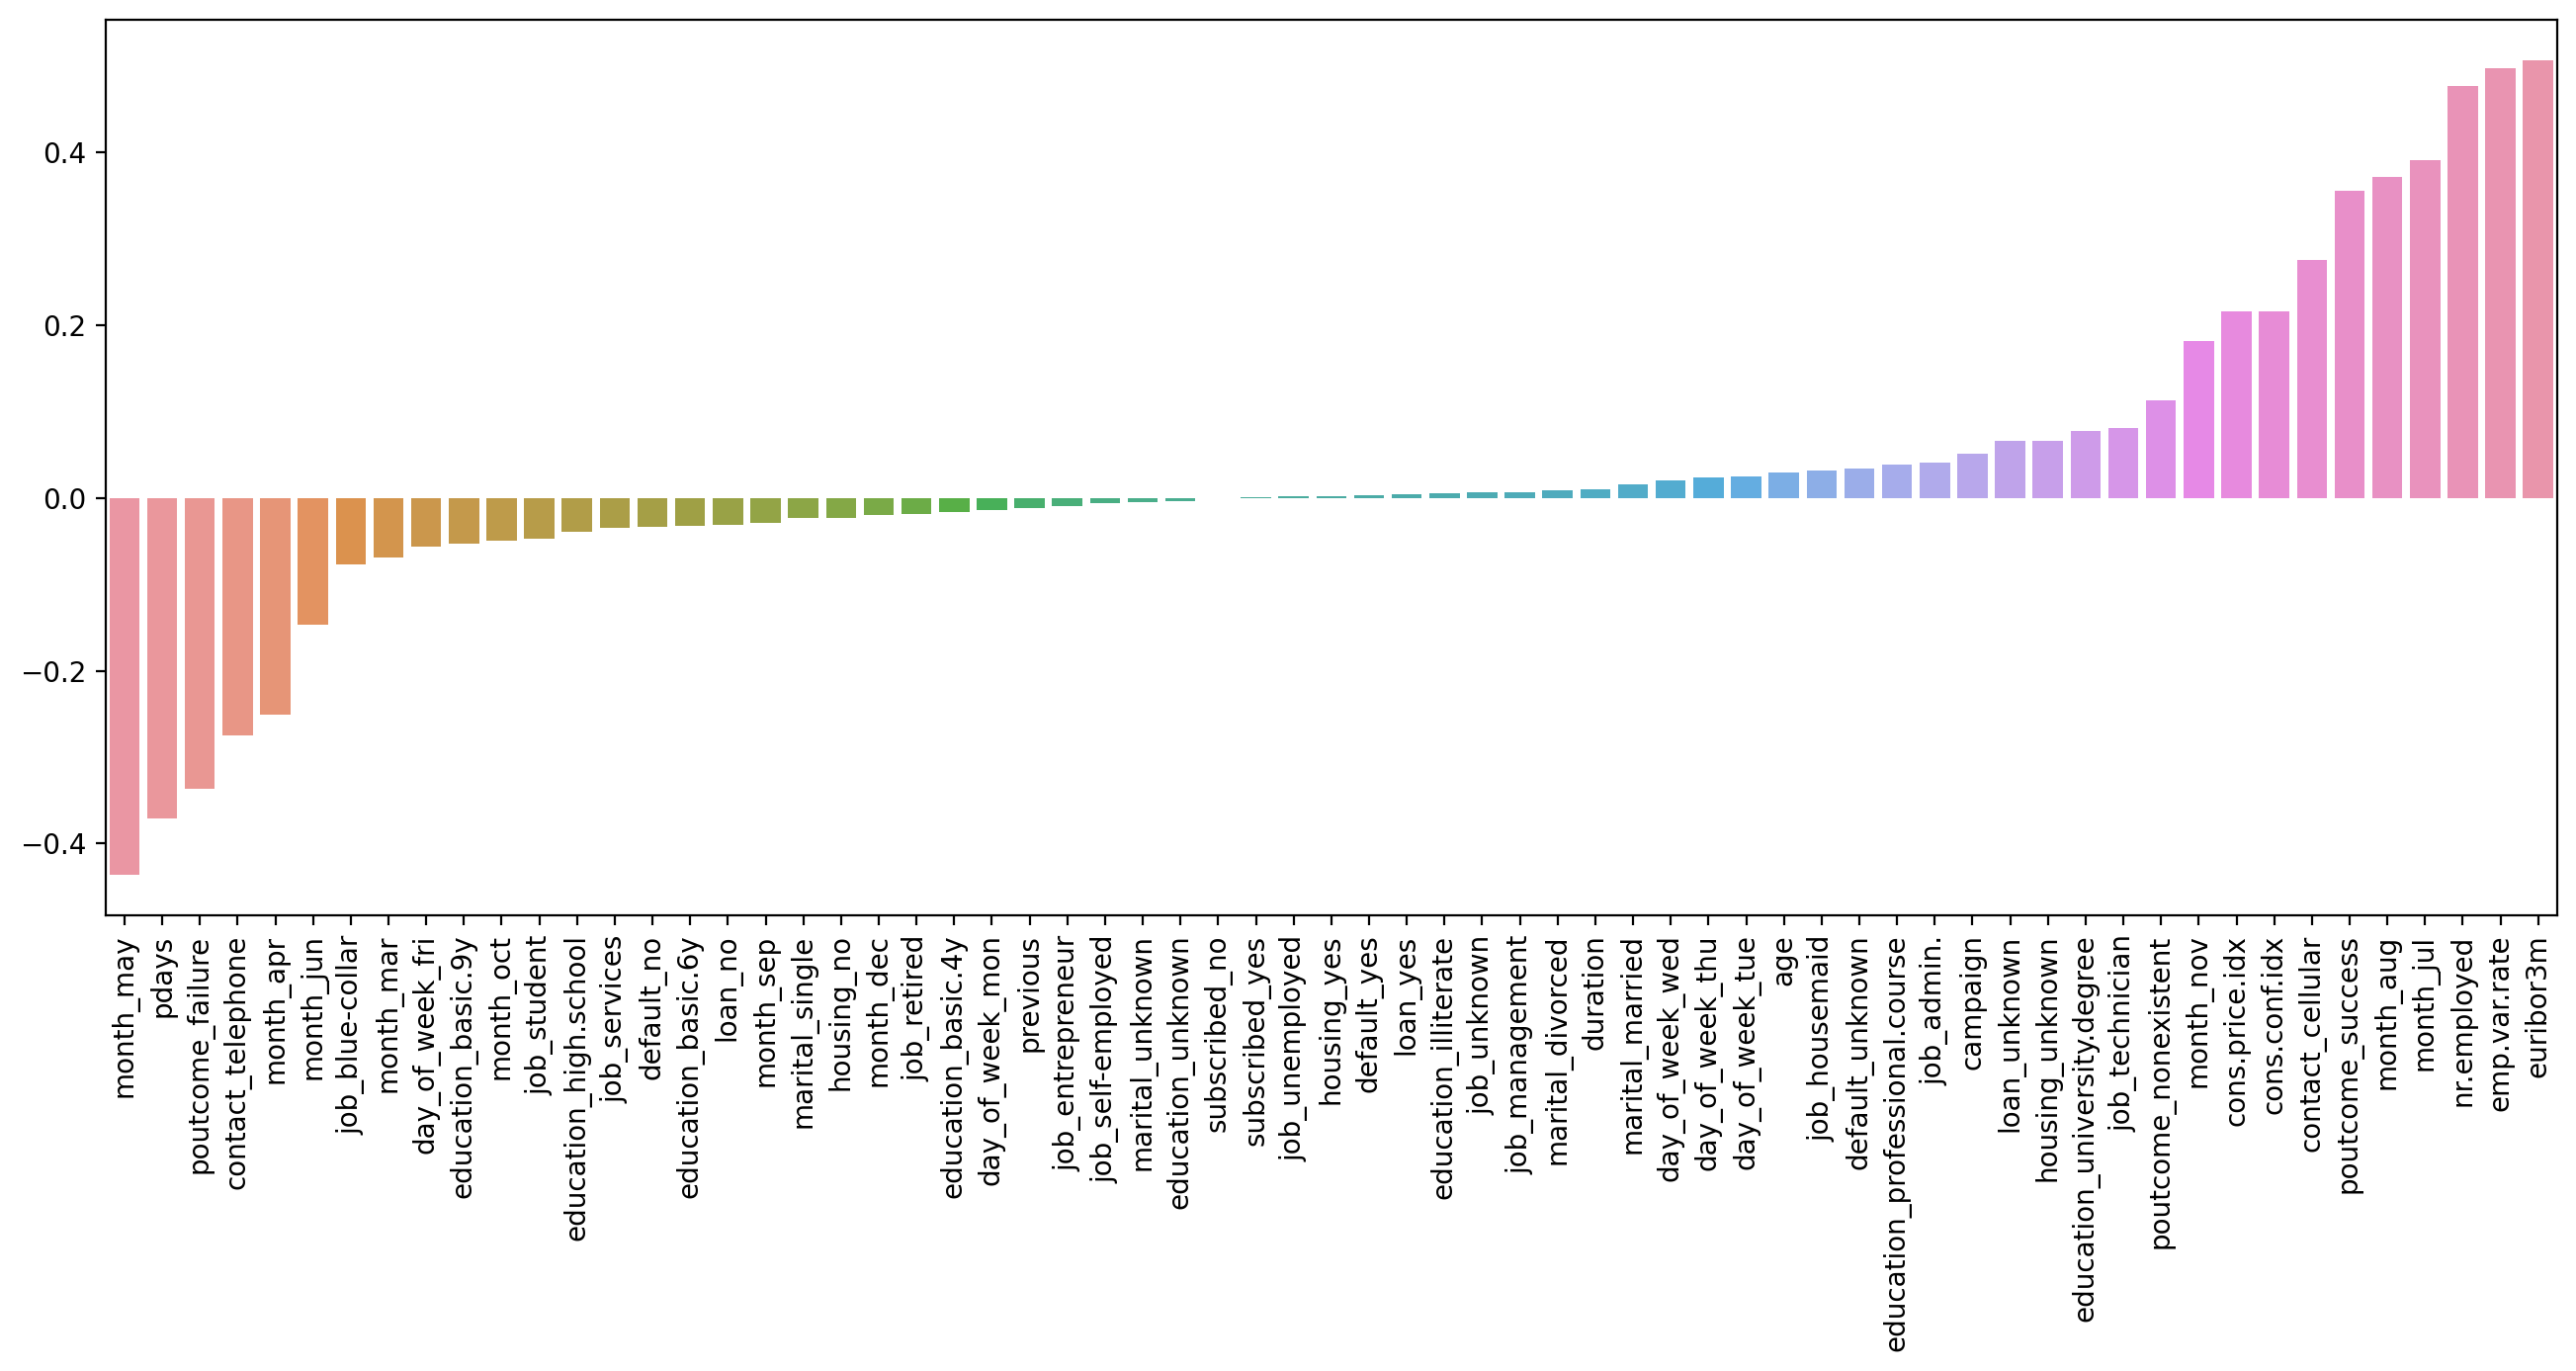

In [94]:
plt.figure(figsize=(16,6),dpi=200)


corr_data = x.corr()['clusters'].iloc[:-1].sort_values()

sns.barplot(x=corr_data.index,y=corr_data.values)

plt.xticks(rotation=90)


plt.show()

# choosing ideal # of clusters (k value) using elbow method

* sum of squared error (the central point and distance between that and other points around) after a cutoff point just tends to decline until it wholly becomes zero which means having a central point for every single data point in the data set which we don't want to see so we have to have just the right amount of clusters to partition between one group from the other. 

In [95]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    model.fit(scaled_x)
    
    ssd.append(model.inertia_) # this is ssd(sum of squared error between the central point and all points around it)
    
    
ssd

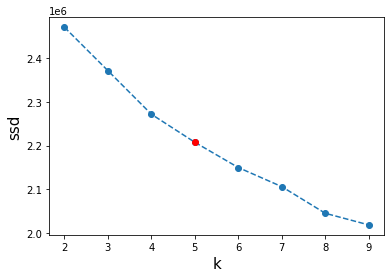

In [96]:
# plotting ssd

k = np.arange(2,10)

plt.plot(k,ssd,'o--')
plt.plot(5,ssd[3],'ro')


plt.xlabel('k',fontsize=15)
plt.ylabel('ssd',fontsize=15)

plt.show()


# notice at about 5 the ssd and k level off and dive deeper down that is the ideal k and ssd

In [97]:
pd.Series(ssd)


# it arranges the numbers in descending order

0    2.469792e+06
1    2.370787e+06
2    2.271503e+06
3    2.207488e+06
4    2.149930e+06
5    2.106329e+06
6    2.045652e+06
7    2.019153e+06
dtype: float64

In [98]:
pd.Series(ssd).diff()

0             NaN
1   -99005.794749
2   -99283.866142
3   -64014.730951
4   -57557.954159
5   -43601.467341
6   -60676.482565
7   -26499.387694
dtype: float64

# free day

In [4]:
import numpy as np
import sympy as sym
from IPython.display import display,Math,Image
sym.init_printing()
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# reading a image and converting it to array of numbers using matplotlib.image


1) .jpg , .png ...> numpy array

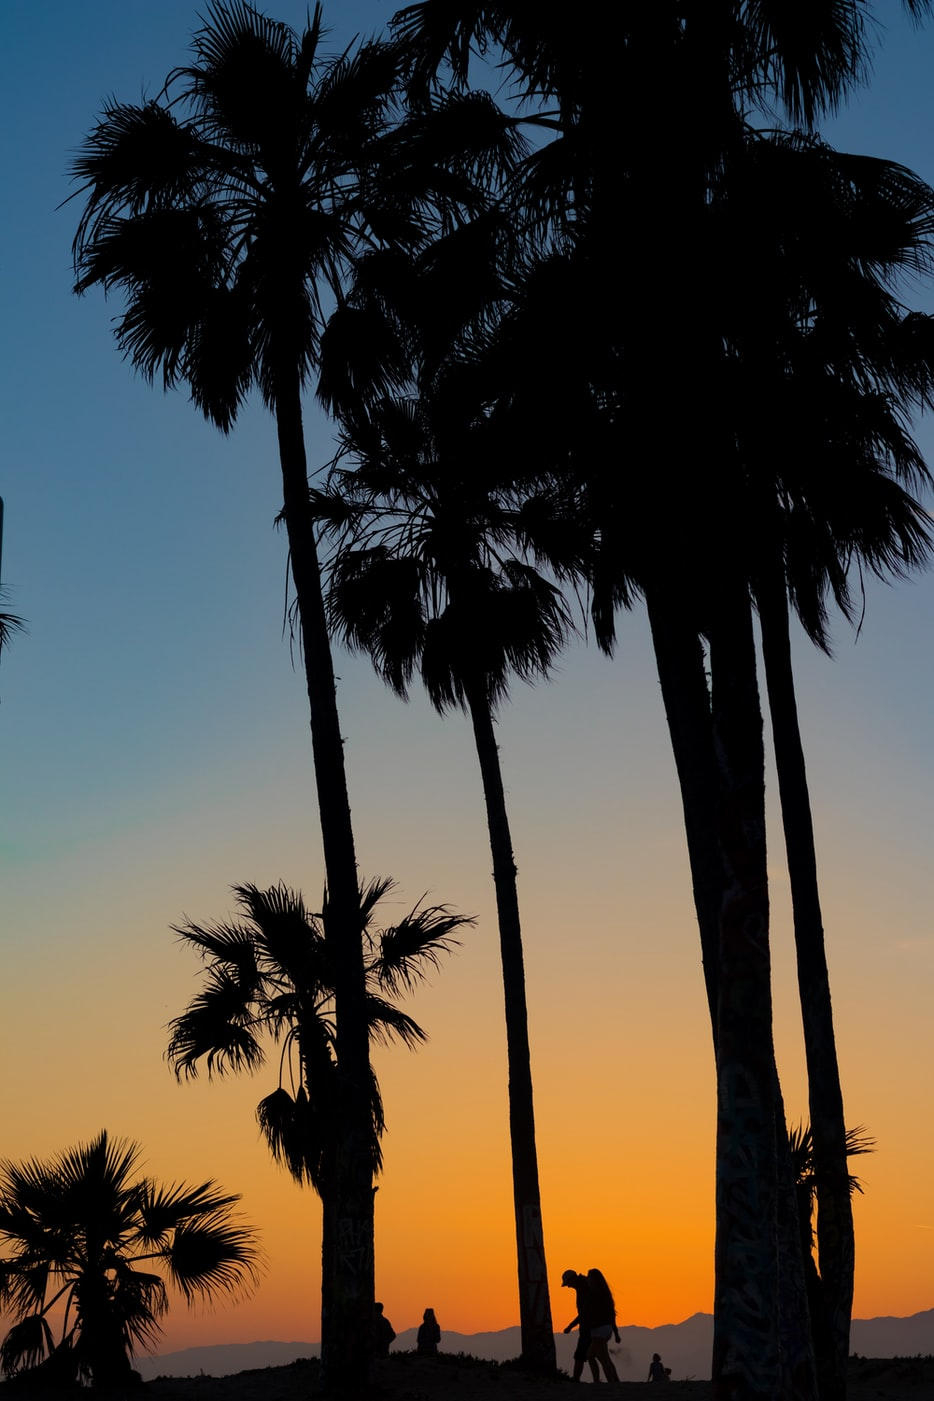

In [5]:
Image('palm_trees.jpg')

In [7]:
image_numbers = mpimg.imread('palm_trees.jpg')


image_numbers

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

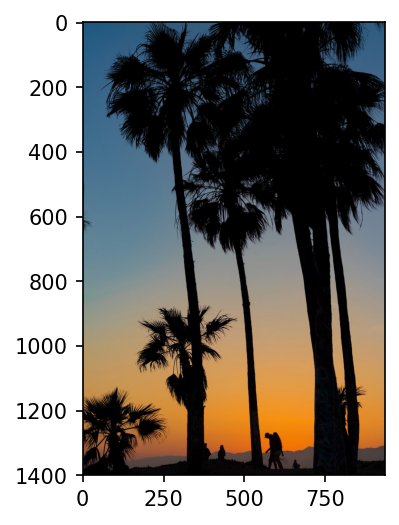

In [10]:
plt.figure(figsize=(12,4),dpi=150)

plt.imshow(image_numbers)

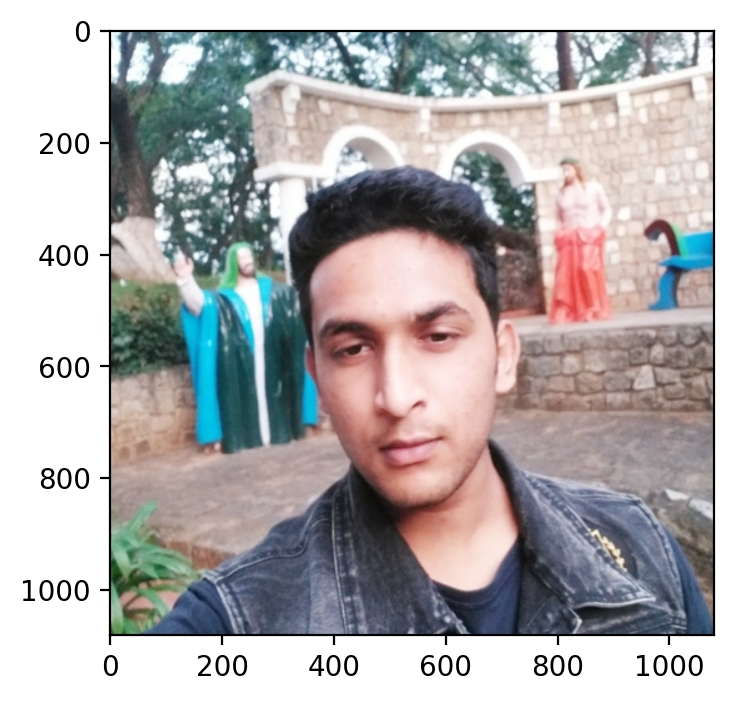

In [17]:
trail = mpimg.imread('George_in_karunyaUniversity.jpg')


plt.figure(dpi=200) # the real image had 96 dpi
plt.imshow(trail)

In [13]:
trail

array([[[156, 168, 166],
        [237, 249, 247],
        [239, 251, 249],
        ...,
        [189, 192, 201],
        [134, 137, 146],
        [ 83,  86,  95]],

       [[158, 170, 168],
        [240, 252, 250],
        [240, 252, 250],
        ...,
        [185, 188, 197],
        [131, 134, 143],
        [ 81,  84,  93]],

       [[163, 173, 172],
        [244, 254, 253],
        [243, 253, 252],
        ...,
        [181, 184, 193],
        [127, 130, 139],
        [ 76,  79,  88]],

       ...,

       [[ 32,  56,  22],
        [ 52,  78,  43],
        [ 53,  79,  40],
        ...,
        [ 46,  69, 100],
        [ 49,  72, 103],
        [ 31,  52,  81]],

       [[ 32,  56,  24],
        [ 53,  77,  43],
        [ 54,  80,  43],
        ...,
        [ 46,  69, 100],
        [ 50,  73, 104],
        [ 32,  53,  82]],

       [[ 31,  55,  23],
        [ 52,  76,  44],
        [ 53,  79,  42],
        ...,
        [ 47,  70, 101],
        [ 50,  73, 104],
        [ 33,  54,  83]]

In [16]:
trail.shape # height, width, color

# using k-means to quantize the colors and show different clusters of colors in the image

# (H,W,C) ---> (H*W,C)



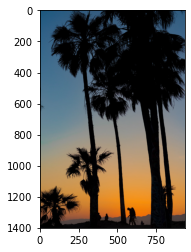

In [23]:
plt.imshow(image_numbers)

In [20]:
(H,W,C) = image_numbers.shape

(H,W,C)

In [21]:
image_numbers_2d = image_numbers.reshape(H*W,C)

image_numbers_2d.shape

# why convert to 2d? because kmeans takes only 2d array. 3d array is not acceptable.

In [25]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6)

labels = model.fit_predict(image_numbers_2d)

labels

array([3, 3, 3, ..., 0, 0, 0])

# getting the different color clusters of the image

In [28]:
cluster_centres = model.cluster_centers_.round(0).astype(int)

cluster_centres

array([[  3,   3,   4],
       [191, 155, 110],
       [137, 144, 144],
       [ 71, 109, 138],
       [ 67,  62,  62],
       [219, 135,  47]])

In [31]:
cluster_centres[3]

array([ 71, 109, 138])

In [30]:
cluster_centres[labels]

array([[ 71, 109, 138],
       [ 71, 109, 138],
       [ 71, 109, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

In [33]:
pic_cluster = np.reshape(cluster_centres[labels],(H,W,C))

pic_cluster

array([[[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

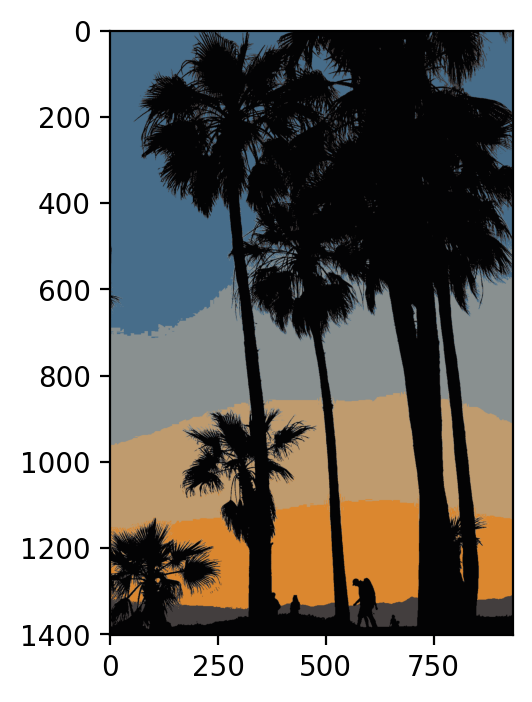

In [35]:
plt.figure(dpi=200)

plt.imshow(pic_cluster)

plt.show()

# pic_cluster for trail

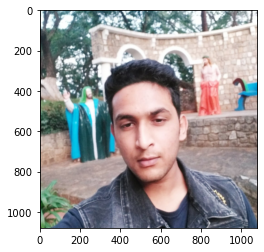

In [39]:
import matplotlib.image as mpimg




trail = mpimg.imread('George_in_karunyaUniversity.jpg')

plt.imshow(trail)

In [45]:
# converting the image to 2d for processing in KMeans

h,w,c = trail.shape


trail_2d = trail.reshape(h*w,c)

trail_2d

array([[156, 168, 166],
       [237, 249, 247],
       [239, 251, 249],
       ...,
       [ 47,  70, 101],
       [ 50,  73, 104],
       [ 33,  54,  83]], dtype=uint8)

# finding the ideal # of number of clusters for the image trail

In [64]:
from sklearn.cluster import KMeans

ssd = []

for k in range(12,18):
    
    model = KMeans(n_clusters = k)
    
    model.fit(trail_2d)
    ssd.append(model.inertia_)
    
ssd
    
# i had to interupt it. elbow method to check for ideal k value is the most inefficient method.    

KeyboardInterrupt: 

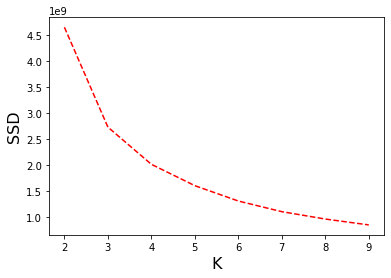

In [48]:
k = np.arange(12,18,1)

plt.plot(k,ssd,'r--')
plt.xlabel('K',fontsize=16)
plt.ylabel('SSD',fontsize=16)


plt.show()


# around 4 clusters would be good enough i guess

In [60]:
model = KMeans(n_clusters=14)

labels = model.fit_predict(trail_2d)

labels

array([10,  2,  2, ..., 11,  1, 11])

In [61]:
cluster_centres = model.cluster_centers_.round(0).astype(int)

cluster_centres

array([[173, 188, 194],
       [ 71,  90, 101],
       [245, 243, 242],
       [ 97, 117, 125],
       [214, 131, 125],
       [ 37,  37,  39],
       [231, 213, 209],
       [ 20, 178, 215],
       [151, 123, 115],
       [120,  85,  80],
       [175, 158, 155],
       [ 53,  67,  74],
       [131, 147, 152],
       [215, 182, 175]])

In [62]:
pic_cluster = cluster_centres[labels].reshape(h,w,c)

pic_cluster

array([[[175, 158, 155],
        [245, 243, 242],
        [245, 243, 242],
        ...,
        [173, 188, 194],
        [131, 147, 152],
        [ 71,  90, 101]],

       [[175, 158, 155],
        [245, 243, 242],
        [245, 243, 242],
        ...,
        [173, 188, 194],
        [131, 147, 152],
        [ 71,  90, 101]],

       [[175, 158, 155],
        [245, 243, 242],
        [245, 243, 242],
        ...,
        [173, 188, 194],
        [131, 147, 152],
        [ 71,  90, 101]],

       ...,

       [[ 37,  37,  39],
        [ 53,  67,  74],
        [ 53,  67,  74],
        ...,
        [ 53,  67,  74],
        [ 71,  90, 101],
        [ 53,  67,  74]],

       [[ 37,  37,  39],
        [ 53,  67,  74],
        [ 53,  67,  74],
        ...,
        [ 53,  67,  74],
        [ 71,  90, 101],
        [ 53,  67,  74]],

       [[ 37,  37,  39],
        [ 53,  67,  74],
        [ 53,  67,  74],
        ...,
        [ 53,  67,  74],
        [ 71,  90, 101],
        [ 53,  67,  74]]

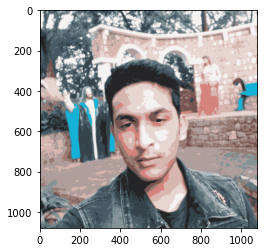

In [63]:
plt.imshow(pic_cluster)